## Keras Convolutional Neural Networks with MNIST

# MNIST Dataset
### Overview
-The MNIST dataset is a collection of handwritten digits commonly used for training and testing various machine learning models. Each image in the dataset is a grayscale image of a handwritten digit, and the dataset is labeled with the corresponding digit (0 through 9).

### Characteristics
Image Size: 28x28 pixels
Image Format: Grayscale
Number of Classes: 10 (Digits 0 through 9)
Total Images: 60,000 training images and 10,000 testing images

In [28]:
from keras.datasets import mnist
import warnings

# Ignore all warnings (use with caution)
warnings.filterwarnings("ignore")


In [29]:
## loading mnist data sets
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

##  Visualizing the Image Data

In [30]:
## visualization of data 
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
x_train.shape

(60000, 28, 28)

In [32]:
#grabing first image of train data
single_image = x_train[0]

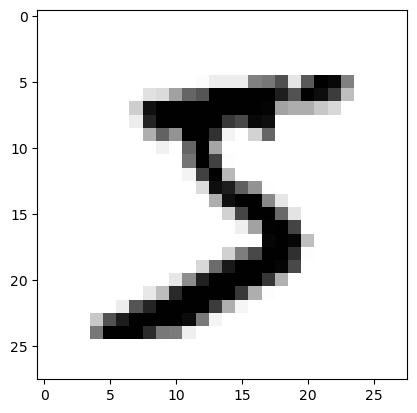

In [33]:
plt.imshow(single_image, cmap = "gray_r")

# PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

## Labels

In [34]:
y_train 

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [35]:
y_train.shape

(60000,)

In [36]:
from keras.utils import to_categorical


In [37]:
## categarization of data
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [38]:
## convertion to one hot coded
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Processing X Data

We should normalize the X data

In [39]:
single_image.max()

255

In [40]:
### normalization between 0 to 1

x_train = x_train /x_train.max()
x_test = x_test  /x_test.max()

In [41]:
scaled_image = x_train[0]

In [42]:
scaled_image.max()

1.0

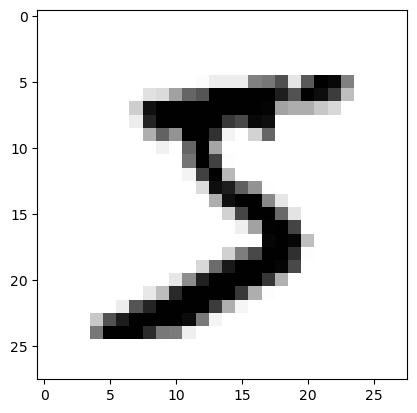

In [43]:
plt.imshow(scaled_image, cmap = "gray_r")

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [44]:
x_train.shape
## reshaping the data
x_train = x_train.reshape(60000,28,28,1)

In [45]:
x_train.shape

(60000, 28, 28, 1)

In [46]:
x_test.shape
## reshaping the data
x_test = x_test.reshape(10000,28,28,1)

In [47]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

In [48]:
##  we have scaled and hot coded our data so our network can understand 
## from now we will start building our ml model

In [49]:
## importing sequential model
from keras.models import Sequential

In [50]:
## importing layers for network
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [51]:
## first step is creating a model

##creating sequential object
model = Sequential()

##convulutional layer
model.add(Conv2D(filters = 32,kernel_size=(4,4),input_shape=(28, 28, 1),activation="relu"))

##pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

##flatterning out pooling and convolution layer so dense can understand it(2d--> 1d)
model.add(Flatten())


##after flattering out we will gonaa add one more dense layer
model.add(Dense(128,activation="relu"))

##output layer
model.add(Dense(10,activation="softmax"))


##compilation of model
model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [52]:
## providing model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [53]:
## training our model
model.fit(x_train,y_cat_train,epochs=2)

Epoch 1/2


1875/1875 [==============================] - 11s 5ms/step - loss: 0.1373 - accuracy: 0.9581
Epoch 2/2
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0477 - accuracy: 0.9858


In [54]:
## Evaluate the Model

In [55]:
##evaluating model
model.metrics_names

model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0437 - accuracy: 0.9858


[0.04368365928530693, 0.98580002784729]

In [56]:
## prediction classses on images  model has never seen before

from sklearn.metrics import classification_report
import numpy as np


In [57]:
predictions = model.predict(x_test)

predicted_classes = [int(np.argmax(prediction)) for prediction in predictions]



313/313 [==============================] - 1s 1ms/step


In [58]:
print(predicted_classes)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [59]:
print(y_test)

[7 2 1 ... 4 5 6]


In [60]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [61]:
###printing classification report and comparing with y test

print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.96      1.00      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.97      0.98      0.97       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

